In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import numpy as np

In [ ]:
file_path = "/content/drive/MyDrive/Celerates MSIB/ALL Dataset/data_titanic.csv"

In [ ]:
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#hendling missing value

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1) # Notice 'PassengerId' instead of 'PassengerID'
y = df['Survived']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
#get dummies
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 157 entries, Pclass to Embarked_S
dtypes: bool(152), float64(2), int64(3)
memory usage: 167.2 KB


In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 157)
(268, 157)
(623,)
(268,)


In [ ]:
#build model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
#Evaluation
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       157
           1       0.77      0.09      0.16       111

    accuracy                           0.61       268
   macro avg       0.69      0.54      0.45       268
weighted avg       0.67      0.61      0.50       268



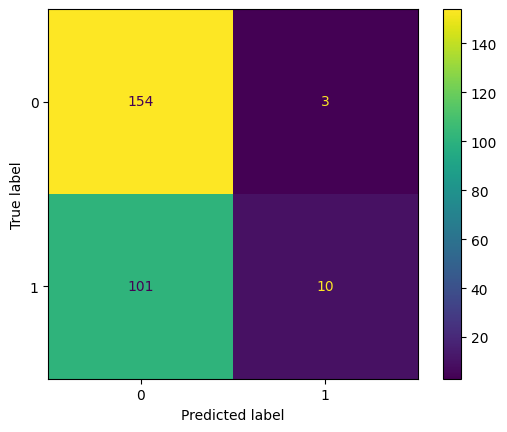

In [ ]:
#visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
#Save model
pth = "/content/drive/MyDrive/Celerates MSIB/Machine Learning/Pertemuan H2/Machine Learning H2.ipynb#"
filename = 'model_titanic.pkl'
pickle.dump(model, open(pth+filename, 'wb'))

In [ ]:
#load model
loaded_model = pickle.load(open(pth+filename, 'rb'))

In [ ]:
x_test.values[0]

array([3, 29.69911764705882, 1, 1, 15.2458, False, True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#Generate New Data
x_new = np.array ([3, 25, 1, 1, 15.2458, False, True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, True, False, False]).reshape(1, -1)
y_new = loaded_model.predict(x_new)
print(y_new)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
